Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import psutil

Carga de datos

In [3]:
clientes = pd.read_csv('cliente_tabla.csv')
productos = pd.read_csv('producto_tabla.csv')
#sample_submission = pd.read_csv('sample_submission.csv')
#test  = pd.read_csv('test.csv')
town_state  = pd.read_csv('town_state.csv')

In [4]:
train = pd.read_csv('train.csv')

Para hacer seguimiento a la memoria

In [5]:
import pandas as pd
import sys

def variables_por_tamaño():
    variables = {k: sys.getsizeof(v) for k, v in globals().items() if not k.startswith('_')}
    
    variables_en_gb = {k: v / 1024**3 for k, v in variables.items()}
    
    tipos_variables = {k: type(v).__name__ for k, v in globals().items() if not k.startswith('_')}
    
    df = pd.DataFrame({'Variable': list(variables_en_gb.keys()),
                       'Tipo': list(tipos_variables.values()),
                       'Tamaño_GB': list(variables_en_gb.values())})
    
    df = df.sort_values('Tamaño_GB', ascending=False).reset_index(drop=True)
    
    # Mostrar la memoria disponible
    memoria_disponible()
    
    return df



def Gb_por_variable(variable):
    
    print(sys.getsizeof(variable)/(1024**3))
    memoria_disponible()

def memoria_disponible():
    mem = psutil.virtual_memory()
    mem_total_gb = mem.total / (1024 ** 3)  # Memoria total en GB
    mem_disponible_gb = mem.available / (1024 ** 3)  # Memoria disponible en GB

    print("Memoria Total:", mem_total_gb, "GB")
    print("Memoria Disponible:", mem_disponible_gb, "GB")


##### Explorando la data

In [6]:
for col in train.columns:
    print(col + ' tiene valores unicos: ' + str(train[col].unique().shape[0]))

Semana tiene valores unicos: 7
Agencia_ID tiene valores unicos: 552
Canal_ID tiene valores unicos: 9
Ruta_SAK tiene valores unicos: 3603
Cliente_ID tiene valores unicos: 880604
Producto_ID tiene valores unicos: 1799
Venta_uni_hoy tiene valores unicos: 2116
Venta_hoy tiene valores unicos: 78140
Dev_uni_proxima tiene valores unicos: 558
Dev_proxima tiene valores unicos: 14707
Demanda_uni_equil tiene valores unicos: 2091


In [7]:
print(train.shape)
print(train.dtypes)
train.tail()

(74180464, 11)
Semana                 int64
Agencia_ID             int64
Canal_ID               int64
Ruta_SAK               int64
Cliente_ID             int64
Producto_ID            int64
Venta_uni_hoy          int64
Venta_hoy            float64
Dev_uni_proxima        int64
Dev_proxima          float64
Demanda_uni_equil      int64
dtype: object


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
74180459,9,25759,1,5517,4528866,32873,4,27.76,0,0.00,4
74180460,9,25759,1,5517,4528866,34226,4,37.04,0,0.00,4
74180461,9,25759,1,5517,4528866,45112,4,51.00,0,0.00,4
74180462,9,25759,1,5517,4547943,40217,3,26.94,3,26.94,0
74180463,9,25759,1,5517,4708097,43159,1,10.40,0,0.00,1


In [8]:
#train.duplicated().any()

In [9]:
#clientes.duplicated().any()

In [10]:
datos_por_producto = train.groupby(['Producto_ID']).sum()
datos_por_semana = train.groupby(['Semana']).sum()
datos_por_canal = train.groupby(['Canal_ID']).mean()

Productos que no están en la tabla producto pero si la de train

Todos los producto están en la bd productos

In [11]:
codigos_producto_df_train = set(datos_por_producto.index)
productos_en_df_productos = set(productos['Producto_ID']) 

productos_no_comunes = codigos_producto_df_train - productos_en_df_productos
productos_no_comunes

set()

In [12]:
datos_por_producto_con_ventas = datos_por_producto['Venta_uni_hoy']

In [13]:
datos_por_producto[datos_por_producto['Venta_uni_hoy']>0]['Venta_uni_hoy'].sort_values(ascending=False).iloc[:10]

Producto_ID
2425     23860309
1278     19660667
1284     19625219
43285    15259454
36610    12836368
1240     12313013
1250     12158858
2233     11204505
1242     10469789
45143    10062825
Name: Venta_uni_hoy, dtype: int64

In [14]:
datos_por_canal[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']]

,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima
Canal_ID,,,,
1,5.794558,46.618365,0.091610,0.809501
2,62.420939,1119.820456,1.460698,23.540922
4,12.417794,125.341238,0.072483,0.679674
5,142.468166,1182.018329,9.217717,62.890671
6,12.684618,101.543731,0.193010,1.620715
7,15.320508,178.691976,0.197901,2.367305
8,46.705331,621.013114,3.029819,25.748718
9,88.616402,4057.629206,0.000000,0.000000
11,14.925800,168.864900,0.256623,2.422330


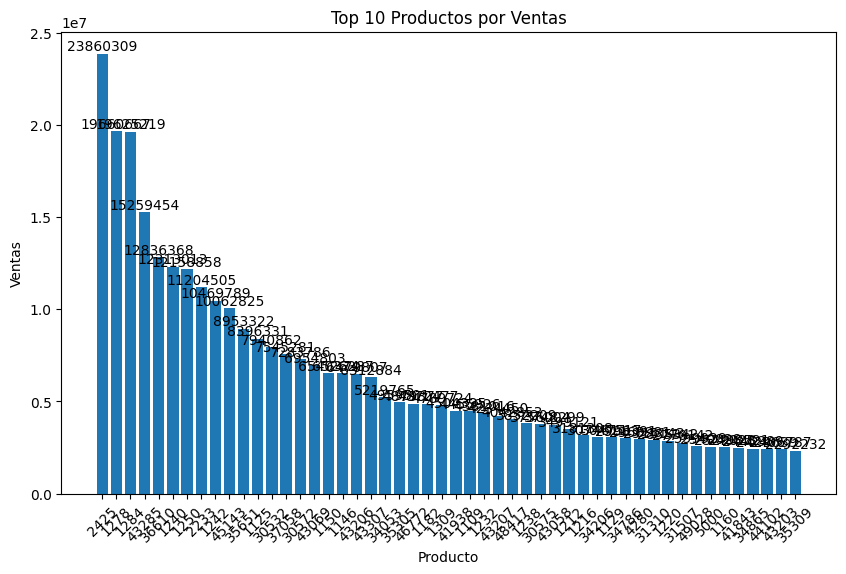

In [15]:
import matplotlib.pyplot as plt

# Seleccionar los datos relevantes (por ejemplo, los 10 productos con las mayores ventas)
top_10_productos = datos_por_producto[datos_por_producto['Venta_uni_hoy'] > 0]['Venta_uni_hoy'].nlargest(50)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(x=top_10_productos.index.astype('str'), height=top_10_productos.values)

# Personalizar el gráfico
plt.title('Top 10 Productos por Ventas')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización

for etq in np.arange(len(top_10_productos)):
    plt.text(x=etq,y=top_10_productos.values[etq],s=top_10_productos.values[etq],
             va='bottom',ha='center')
# Mostrar el gráfico
plt.show()

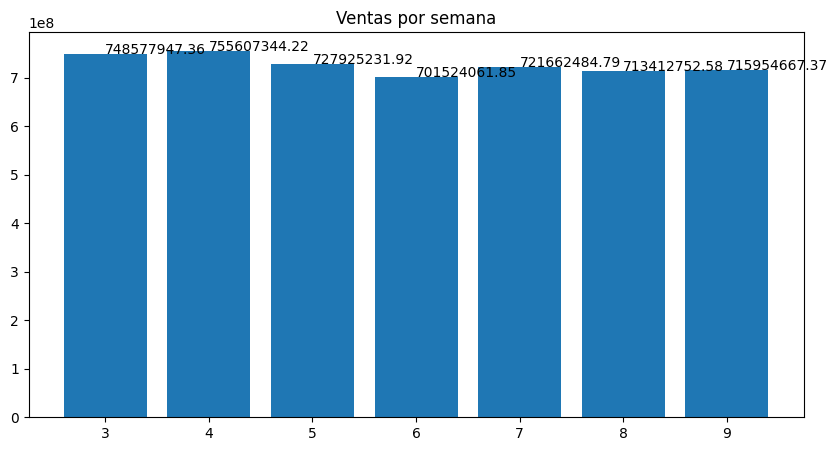

In [16]:
plt.figure(figsize=(10,5))
plt.bar(x=datos_por_semana.index,height=np.array(datos_por_semana['Venta_hoy']))
plt.title('Ventas por semana')
for etq in datos_por_semana['Venta_hoy']:
    plt.text(x=datos_por_semana[datos_por_semana['Venta_hoy']==etq].index[0],y=etq,s=etq)
plt.show()

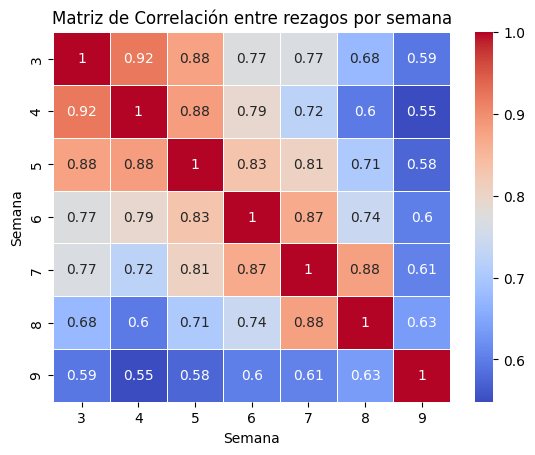

In [17]:
Ventas_por_semana = pd.pivot_table(data=train,index='Producto_ID',columns='Semana')
correlaciones = Ventas_por_semana['Agencia_ID'].reset_index().drop(columns='Producto_ID').corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre rezagos por semana')
plt.show()

Comportamiento de un producto

In [18]:
def mostrar_comportamiento_de_un_producto(df,producto,agencia,cliente):
    df_filtrado = df[(df['Producto_ID']==producto) &
                      (df['Agencia_ID']==agencia) &
                      (df['Cliente_ID']==cliente)] 

    return df_filtrado

#24225
mostrar_comportamiento_de_un_producto(df=train,producto=1212,agencia=1110,cliente=15766)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
11165209,4,1110,7,3301,15766,1212,4,33.52,0,0.0,4
22174800,5,1110,7,3301,15766,1212,5,41.90,0,0.0,5
53364883,8,1110,7,3301,15766,1212,4,33.52,0,0.0,4
63771751,9,1110,7,3301,15766,1212,1,8.38,0,0.0,1


#### Pre procesando data

In [19]:
#Número de clientes duplicados
print(clientes.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)[clientes.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)['NombreCliente']==2].shape)
clientes_Sin_duplicados = clientes.drop_duplicates(subset=['Cliente_ID'],keep='first')
print(clientes_Sin_duplicados.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)[clientes_Sin_duplicados.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)['NombreCliente']==2].shape)

(4862, 1)
(0, 1)


Ingeniería de variables

In [20]:
def calcular_variables(df):
    df['Precio_Promedio'] = df['Venta_hoy']//df['Venta_uni_hoy'] # Precio promedio
    df['Ratio Devoluciones_unit'] =df['Venta_uni_hoy']//df['Dev_uni_proxima'] #Ratio de devoluciones
    df['Ratio_Devoluciones_valor'] = df['Venta_hoy']//df['Dev_proxima'] #Ratio en pesos de devoluciones
    df[np.isinf(df)] = np.nan
    df= df.fillna(0)
    return df

Categorización de productos por comportamiento de ventas

In [21]:
train_producto_grouped = train.groupby(['Producto_ID','Semana'])[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']].sum()
train_producto_grouped = train_producto_grouped.groupby('Producto_ID').mean()
train_producto_grouped = calcular_variables(train_producto_grouped)
train_producto_grouped.head()

,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Precio_Promedio,Ratio Devoluciones_unit,Ratio_Devoluciones_valor
Producto_ID,,,,,,,
41,3207.428571,5.806704e+04,32.428571,587.930000,18.0,98.0,98.0
53,4740.714286,6.779424e+04,0.142857,2.042857,14.0,33184.0,33185.0
72,103276.857143,3.812000e+05,1685.000000,6221.500000,3.0,61.0,61.0
73,102152.714286,2.192466e+06,2491.714286,53228.017143,21.0,40.0,41.0
100,166.571429,3.166829e+03,137.285714,2972.704286,19.0,1.0,1.0


(1799, 2)

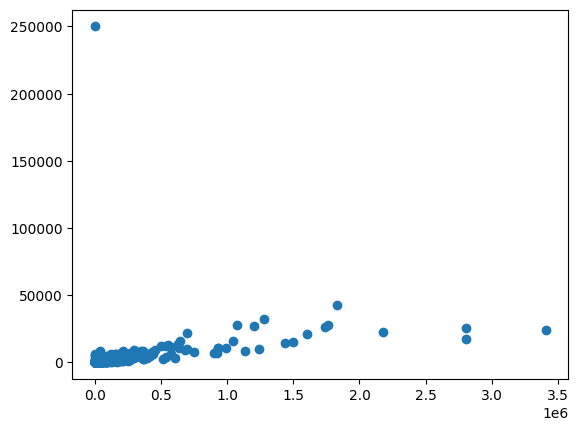

In [22]:
train_producto_grouped = train_producto_grouped[['Venta_uni_hoy','Dev_uni_proxima']].copy()
train_producto_grouped[np.isinf(train_producto_grouped)] = np.nan
train_producto_grouped= train_producto_grouped.fillna(0)
plt.scatter(x=train_producto_grouped['Venta_uni_hoy'],y=train_producto_grouped['Dev_uni_proxima'])
train_producto_grouped.shape

In [23]:
Q1 = train_producto_grouped.quantile(0.25)
Q3 = train_producto_grouped.quantile(0.75)
IQR = Q3 - Q1

l_inf = Q1 - 1.5 * IQR
l_sup = Q3 + 1.5 * IQR


outliers = train_producto_grouped[(train_producto_grouped < l_inf) | (train_producto_grouped > l_sup)]

filas_con_nulos = outliers[outliers.isnull().any(axis=1)].index
filas_sin_nulos = outliers[outliers.notnull().all(axis=1)].index
train_producto_grouped_sin_outliers = train_producto_grouped.loc[filas_sin_nulos] 
train_producto_grouped_solo_outliers = train_producto_grouped.loc[filas_con_nulos] 

train_producto_grouped_sin_outliers.sort_values(by='Venta_uni_hoy')

,Venta_uni_hoy,Dev_uni_proxima
Producto_ID,,
31089,3.642286e+04,1308.857143
3919,3.686386e+04,2101.285714
32322,3.697686e+04,1241.285714
43230,3.756271e+04,2000.714286
34208,3.805129e+04,1793.142857
...,...,...
36610,1.833767e+06,42535.000000
43285,2.179922e+06,22630.714286
1284,2.803603e+06,17467.571429


Asignación de grupo para no outliers

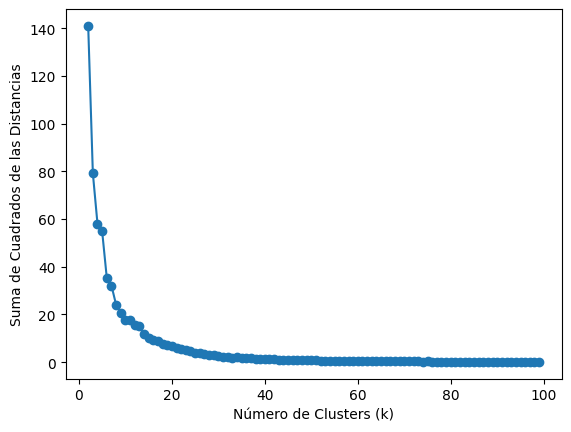

10
El numero de clusters es [0 1 2 3 4 5 6 7 8 9]


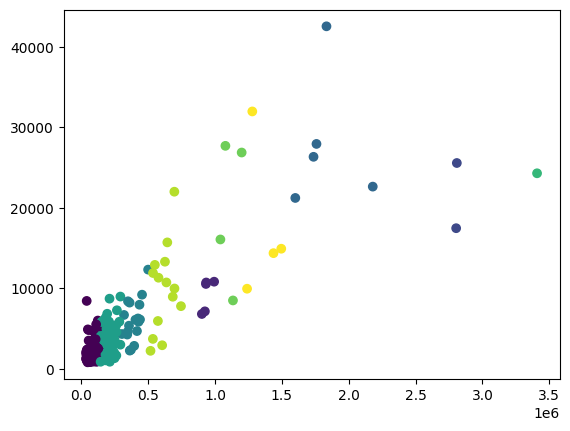

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn_extra.cluster import KMedoids

scaler_sin_out = StandardScaler()
train_scaled = scaler_sin_out.fit_transform(train_producto_grouped_sin_outliers)


inercia_by_cluster = []
for k in range(2, 100):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(train_scaled)
    inercia_by_cluster.append(kmeans.inertia_)

plt.plot(range(2, 100), inercia_by_cluster, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados de las Distancias')
plt.show()

num_clusters = range(1, len(inercia_by_cluster) + 1)

knee = KneeLocator(num_clusters, inercia_by_cluster, S=1, curve='convex', direction='decreasing')
print(num_clusters[knee.knee])

kmeans = KMeans(n_clusters=num_clusters[knee.knee],n_init='auto')
kmeans.fit(train_producto_grouped_sin_outliers)

labels = kmeans.labels_

train_producto_grouped_sin_outliers_cluster = train_producto_grouped_sin_outliers.copy()
train_producto_grouped_sin_outliers_cluster['Cluster'] = labels
print('El numero de clusters es '+str(np.unique(labels)))
plt.scatter(x=train_producto_grouped_sin_outliers_cluster['Venta_uni_hoy'],y=train_producto_grouped_sin_outliers_cluster['Dev_uni_proxima'],c=train_producto_grouped_sin_outliers_cluster['Cluster'])

Asignación de grupo para outliers

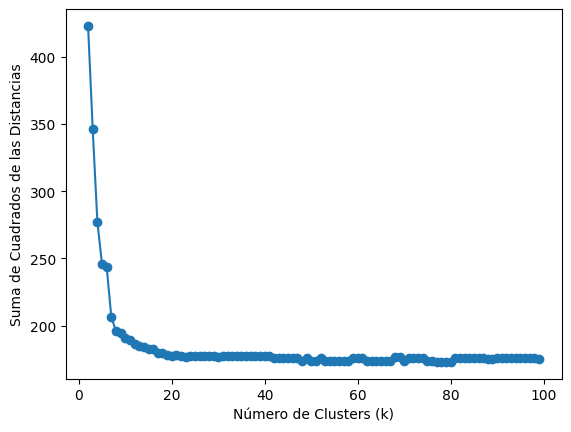

12
El numero de clusters es [ 0  1  2  3  4  5  6  7  8  9 10 11]


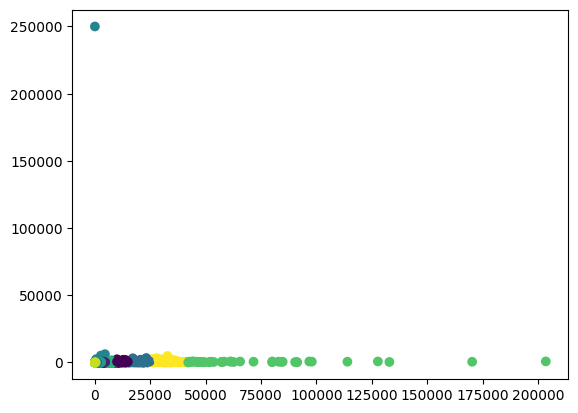

In [25]:
scaler_solo_outliers = StandardScaler()
train_scaled = scaler_solo_outliers.fit_transform(train_producto_grouped_solo_outliers)

inercia_by_cluster = []
for k in range(2, 100):
    kmeans = KMedoids(n_clusters=k)
    kmeans.fit(train_scaled)
    inercia_by_cluster.append(kmeans.inertia_)

plt.plot(range(2, 100), inercia_by_cluster, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados de las Distancias')
plt.show()

num_clusters = range(1, len(inercia_by_cluster) + 1)

knee = KneeLocator(num_clusters, inercia_by_cluster, S=1, curve='convex', direction='decreasing')
print(num_clusters[knee.knee])

kmeans = KMedoids(n_clusters=num_clusters[knee.knee])
kmeans.fit(train_scaled)

labels = kmeans.labels_

train_producto_grouped_solo_outliers_cluster = train_producto_grouped_solo_outliers.copy()
train_producto_grouped_solo_outliers_cluster['Cluster'] = labels
print('El numero de clusters es '+str(np.unique(labels)))
plt.scatter(x=train_producto_grouped_solo_outliers_cluster['Venta_uni_hoy'],y=train_producto_grouped_solo_outliers_cluster['Dev_uni_proxima'],c=train_producto_grouped_solo_outliers_cluster['Cluster'])

Unión de grupos

In [26]:
# Unión de outliers y no outliers
train_producto_grouped_solo_outliers_cluster_worked = train_producto_grouped_solo_outliers_cluster.copy()

train_producto_grouped_solo_outliers_cluster_worked['Cluster'].unique()
train_producto_grouped_solo_outliers_cluster_worked['Cluster'] = train_producto_grouped_solo_outliers_cluster_worked['Cluster']+1+train_producto_grouped_sin_outliers_cluster['Cluster'].max()
train_producto_grouped_solo_outliers_cluster_worked['Cluster'].unique()

Clusteres_definidos = pd.concat([train_producto_grouped_solo_outliers_cluster_worked,train_producto_grouped_sin_outliers_cluster])[['Cluster']]

del train_producto_grouped_solo_outliers_cluster
del train_producto_grouped_solo_outliers_cluster_worked
del train_producto_grouped_sin_outliers_cluster

print(Clusteres_definidos['Cluster'].unique())
Clusteres_definidos.head()

[11 12 16 20 13 14 17 21 19 18 10 15  0  5  8  7  4  1  3  9  2  6]


,Cluster
Producto_ID,
41,11
53,11
100,12
106,16
107,20


In [27]:
def categorizar_bajo_una_variable(variable,df):
    print(variable)
    print(df[variable].unique().shape)

    df_agg_grouped = df.groupby([variable,'Semana'])[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']].sum()
    df_agg_grouped = df_agg_grouped.groupby(variable).mean()
    df_agg_grouped = df_agg_grouped[['Venta_uni_hoy','Dev_uni_proxima']].copy()

    scaler_sin_out = StandardScaler()
    df_scaled = scaler_sin_out.fit_transform(df_agg_grouped)
    
    limite = 60 if df_agg_grouped.shape[0]> 60 else df_agg_grouped.shape[0]-1
    
    inercia_by_cluster = []
    for k in range(2, limite):
        kmeans = KMeans(n_clusters=k,n_init='auto')
        kmeans.fit(df_scaled)
        inercia_by_cluster.append(kmeans.inertia_)

    num_clusters = range(1, len(inercia_by_cluster) + 1)
    knee = KneeLocator(num_clusters, inercia_by_cluster, S=1, curve='convex', direction='decreasing')
    print('Codo en: ' + str(num_clusters[knee.knee]))

    plt.plot(range(1, limite-1), inercia_by_cluster, marker='o')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Suma de Cuadrados de las Distancias')
    plt.title(variable)
    plt.show()

    kmeans = KMeans(n_clusters=num_clusters[knee.knee],n_init='auto')
    kmeans.fit(df_scaled)

    df_agg_grouped['Cluster_'+variable] = kmeans.labels_
    print(df_agg_grouped['Cluster_'+variable].unique())
    return df_agg_grouped[['Cluster_'+variable]]

def hacer_kmeans_y_ya(variable,df,clusters):
    print(variable)
    print(df[variable].unique().shape)

    df_agg_grouped = df.groupby([variable,'Semana'])[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']].sum()
    df_agg_grouped = df_agg_grouped.groupby(variable).mean()
    df_agg_grouped = df_agg_grouped[['Venta_uni_hoy','Dev_uni_proxima']].copy()

    scaler_sin_out = StandardScaler()
    df_scaled = scaler_sin_out.fit_transform(df_agg_grouped)

    kmeans = KMeans(n_clusters=clusters,n_init='auto')
    kmeans.fit(df_scaled)

    df_agg_grouped['Cluster_'+variable] = kmeans.labels_
    print(df_agg_grouped['Cluster_'+variable].unique())
    return df_agg_grouped[['Cluster_'+variable]]



Agencia_ID
(552,)
Codo en: 12


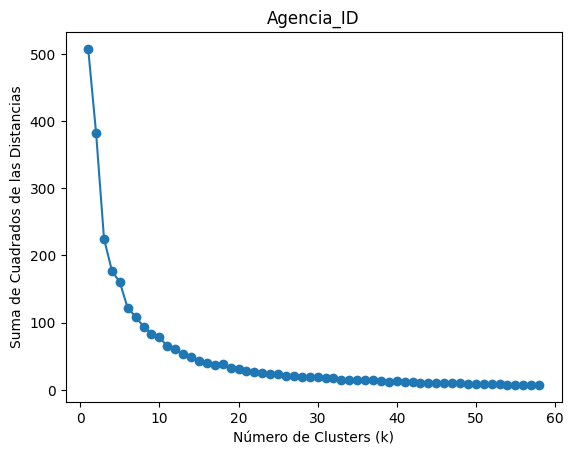

[ 6  5  1  7  9  4  8  3 11  0  2 10]
Ruta_SAK
(3603,)
Codo en: 7


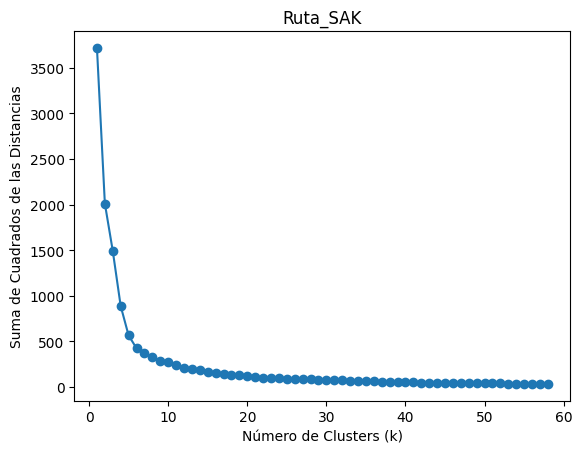

[1 6 5 0 3 2 4]
Cliente_ID
(880604,)
[ 8  4 11 10  0  7  9  6  3  5  1  2]


In [28]:
Agencias = categorizar_bajo_una_variable('Agencia_ID',train)
Rutas = categorizar_bajo_una_variable('Ruta_SAK',train)
Clientes = hacer_kmeans_y_ya('Cliente_ID',train,12)

In [29]:
train_dict = {}
train_dict['Columnas'] = train.columns
train_dict['index'] = train.index
train_dict['Tabla'] = train.to_numpy()

del train

In [30]:
tamano_submatriz = 500000

submatrices_diccionario = {}

num_filas = train_dict['Tabla'].shape[0]
num_submatrices = num_filas // tamano_submatriz

for i in range(num_submatrices+1):
    fila_inicio = i * tamano_submatriz
    fila_fin = (i + 1) * tamano_submatriz
    submatriz = train_dict['Tabla'][fila_inicio:fila_fin, :]
    submatrices_diccionario[i+1] = submatriz

In [31]:
def unir_dfs(df):
    df = df.merge(Clusteres_definidos,how='left',on='Producto_ID')
    df = df.merge(Agencias,how='left',on='Agencia_ID')
    df = df.merge(Rutas,how='left',on='Ruta_SAK')
    df = df.merge(Clientes,how='left',on='Cliente_ID')
    return df

submatrices_diccionario_trabajadas = {}

submatriz=1

#Subprocesamiento para variables definidas y unión a grupos
#for submatriz in np.arange(0,30)+1:
for submatriz in submatrices_diccionario.keys():
    print(str(submatriz)+ '/' + str(len(list(submatrices_diccionario.keys()))) +'|'+str(round(submatriz/len(list(submatrices_diccionario.keys()))*100,3))+'%')
    df_temporal = pd.DataFrame(submatrices_diccionario[submatriz],columns=train_dict['Columnas'])
    df_temporal = unir_dfs(df_temporal).drop(columns=['Producto_ID','Ruta_SAK','Agencia_ID','Cliente_ID']).rename(columns={'Cluster':'Cluster_Producto'})
    df_temporal = calcular_variables(df_temporal)
    train_dict['Columnas_Worked'] = df_temporal.columns
    submatrices_diccionario_trabajadas[submatriz] = df_temporal.to_numpy()
del df_temporal

1/149|0.671%
2/149|1.342%
3/149|2.013%
4/149|2.685%
5/149|3.356%
6/149|4.027%
7/149|4.698%
8/149|5.369%
9/149|6.04%
10/149|6.711%
11/149|7.383%
12/149|8.054%
13/149|8.725%
14/149|9.396%
15/149|10.067%
16/149|10.738%
17/149|11.409%
18/149|12.081%
19/149|12.752%
20/149|13.423%
21/149|14.094%
22/149|14.765%
23/149|15.436%
24/149|16.107%
25/149|16.779%
26/149|17.45%
27/149|18.121%
28/149|18.792%
29/149|19.463%
30/149|20.134%
31/149|20.805%
32/149|21.477%
33/149|22.148%
34/149|22.819%
35/149|23.49%
36/149|24.161%
37/149|24.832%
38/149|25.503%
39/149|26.174%
40/149|26.846%
41/149|27.517%
42/149|28.188%
43/149|28.859%
44/149|29.53%
45/149|30.201%
46/149|30.872%
47/149|31.544%
48/149|32.215%
49/149|32.886%
50/149|33.557%
51/149|34.228%
52/149|34.899%
53/149|35.57%
54/149|36.242%
55/149|36.913%
56/149|37.584%
57/149|38.255%
58/149|38.926%
59/149|39.597%
60/149|40.268%
61/149|40.94%
62/149|41.611%
63/149|42.282%
64/149|42.953%
65/149|43.624%
66/149|44.295%
67/149|44.966%
68/149|45.638%
69/149|46

In [32]:
nombre_archivo = 'Pkl/df_temp.pkl'
with open(nombre_archivo, 'wb') as archivo_pkl:
    pickle.dump(submatrices_diccionario_trabajadas, archivo_pkl)

In [33]:
nombre_archivo = 'Pkl/train_dict_Columnas.pkl'
with open(nombre_archivo, 'wb') as archivo_pkl:
    pickle.dump(train_dict['Columnas'], archivo_pkl)

nombre_archivo = 'Pkl/train_dict_Columnas_worked.pkl'
with open(nombre_archivo, 'wb') as archivo_pkl:
    pickle.dump(train_dict['Columnas_Worked'], archivo_pkl)


nombre_archivo = 'Pkl/Cluster_info.pkl'
with open(nombre_archivo, 'wb') as archivo_pkl:
    pickle.dump([Clusteres_definidos,Agencias,Rutas,Clientes], archivo_pkl)

In [34]:
dfsdojfdsf+fdsfdsf+sd+fsd

NameError: name 'dfsdojfdsf' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def explorar_una_matriz(submatriz):
    return pd.DataFrame(submatrices_diccionario_trabajadas[submatriz],columns=train_dict['Columnas_Worked'])

col_dummies=  ['Cluster_Producto','Cluster_Agencia_ID','Cluster_Ruta_SAK','Cluster_Cliente_ID','Canal_ID','Semana']
indices_cat = [i for i, col in enumerate(train_dict['Columnas_Worked']) if col in col_dummies]
indices_num = [i for i, col in enumerate(train_dict['Columnas_Worked']) if col not in col_dummies]

Dict_Columnas_Dummizadas = {}
Dict_nombres_de_columnas_df_dummizadas = {}

def Duminizar_numpy(submatriz):
    matriz_final=submatrices_diccionario_trabajadas[submatriz][:,indices_num]
    columnas_final = train_dict['Columnas_Worked'][indices_num]
    for col in indices_cat:

        onehot_encoder = OneHotEncoder(drop='first',sparse_output=False)
        one_hot_column = onehot_encoder.fit_transform(submatrices_diccionario_trabajadas[submatriz][:,col].reshape(-1, 1))
        one_hot_column_names=  onehot_encoder.get_feature_names_out([train_dict['Columnas_Worked'][col]])
        columnas_final = np.concatenate((columnas_final ,one_hot_column_names))
        matriz_final = np.concatenate((matriz_final,one_hot_column), axis=1)

    Dict_Columnas_Dummizadas[submatriz] = matriz_final
    Dict_nombres_de_columnas_df_dummizadas[submatriz] = columnas_final
    del matriz_final,columnas_final


for submatriz in submatrices_diccionario_trabajadas.keys():
    print(str(submatriz)+ '/' + str(len(list(submatrices_diccionario_trabajadas.keys()))) +'|'+str(round(submatriz/len(list(submatrices_diccionario_trabajadas.keys()))*100,3))+'%')
    Duminizar_numpy(submatriz)

#print(one_hot_column,one_hot_column_names,submatrices_diccionario_trabajadas[submatriz][:,col])

1/30|3.333%
2/30|6.667%
3/30|10.0%
4/30|13.333%
5/30|16.667%
6/30|20.0%
7/30|23.333%
8/30|26.667%
9/30|30.0%
10/30|33.333%
11/30|36.667%
12/30|40.0%
13/30|43.333%
14/30|46.667%
15/30|50.0%
16/30|53.333%
17/30|56.667%
18/30|60.0%
19/30|63.333%
20/30|66.667%
21/30|70.0%
22/30|73.333%
23/30|76.667%
24/30|80.0%
25/30|83.333%
26/30|86.667%
27/30|90.0%
28/30|93.333%
29/30|96.667%
30/30|100.0%


In [ ]:
#Vamos a crear columnas dummies
col_dummies=  ['Cluster_Producto','Cluster_Agencia_ID','Cluster_Ruta_SAK','Cluster_Cliente_ID','Canal_ID','Semana']

def duminizar_pandas(submatriz):
    dummies = pd.DataFrame(submatrices_diccionario_trabajadas[submatriz],columns=train_dict['Columnas_Worked'])

    solo_dummies = dummies[col_dummies]
    sin_dummies = dummies.drop(columns=col_dummies)
    
    del dummies
    #Crear dummy por columna
    diccionario_columnas_dummies={}
    for col in solo_dummies.columns:

        solo_dummies[col] = solo_dummies[col].astype(str)
        diccionario_columnas_dummies[col] = pd.get_dummies(solo_dummies[[col]],drop_first=True,dtype=int)
    
    #Unir dfs dummies
    df_csveable = pd.concat([sin_dummies]+list(diccionario_columnas_dummies.values()),axis=1) 
    return df_csveable


duminizar_pandas(1)#.to_csv('csv_dummiseado_temporal.csv')

for submatriz in submatrices_diccionario_trabajadas.keys():
    print(str(submatriz)+ '/' + str(len(list(submatrices_diccionario.keys()))) +'|'+str(round(submatriz/len(list(submatrices_diccionario.keys()))*100,3))+'%')
    duminizar_pandas(submatriz)


Unir dfs dumizados

In [ ]:
valores_unicos = np.unique([valor for array in Dict_nombres_de_columnas_df_dummizadas.values() for valor in array])

def ajustar_a_columnas_restantes(submatriz):
    df_temp = pd.DataFrame(Dict_Columnas_Dummizadas[submatriz],columns=Dict_nombres_de_columnas_df_dummizadas[submatriz])
    columnas_faltantes = [col for col in valores_unicos if col not in df_temp.columns]

    for col in columnas_faltantes:
        df_temp[col] = 0  # Puedes cambiar el valor si deseas algo diferente

    return df_temp[valores_unicos].to_numpy()

Diccionario_matrices_columnas_comletas = {}
for submatriz in Dict_Columnas_Dummizadas.keys():
    print(str(submatriz)+ '/' + str(len(list(Dict_Columnas_Dummizadas.keys()))) +'|'+str(round(submatriz/len(list(Dict_Columnas_Dummizadas.keys()))*100,3))+'%')
    Diccionario_matrices_columnas_comletas[submatriz]=ajustar_a_columnas_restantes(submatriz)


1/30|3.333%
2/30|6.667%
3/30|10.0%
4/30|13.333%
5/30|16.667%
6/30|20.0%
7/30|23.333%
8/30|26.667%
9/30|30.0%
10/30|33.333%
11/30|36.667%
12/30|40.0%
13/30|43.333%
14/30|46.667%
15/30|50.0%
16/30|53.333%
17/30|56.667%
18/30|60.0%
19/30|63.333%
20/30|66.667%
21/30|70.0%
22/30|73.333%
23/30|76.667%
24/30|80.0%
25/30|83.333%
26/30|86.667%
27/30|90.0%
28/30|93.333%


MemoryError: Unable to allocate 229. MiB for an array with shape (60, 500000) and data type float64

In [ ]:
Dict_Columnas_Dummizadas

{1: array([[ 3.  , 25.14,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 4.  , 33.52,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 4.  , 39.32,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 2.  , 23.06,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 11.53,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 3.  , 23.34,  0.  , ...,  0.  ,  0.  ,  0.  ]]),
 2: array([[ 4.  , 25.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 2.  , 15.56,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 5.  , 31.25,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 2.  , 32.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 3.  , 22.92,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 6.  , 27.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]]),
 3: array([[ 2.  , 13.52,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  , 18.24,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 3.  , 25.14,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [10.  , 75.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  6.76,  0.  , ...,  

In [ ]:
variables_por_tamaño().head(30)

Memoria Total: 15.411502838134766 GB
Memoria Disponible: 2.6431045532226562 GB


,Variable,Tipo,Tamaño_GB
0,clientes_Sin_duplicados,DataFrame,7.571611e-02
1,clientes,DataFrame,6.917497e-02
2,Clientes,DataFrame,9.841532e-03
3,Ventas_por_semana,DataFrame,8.578449e-04
4,productos,DataFrame,2.425639e-04
5,datos_por_producto,DataFrame,1.474544e-04
6,productos_en_df_productos,set,1.222715e-04
7,codigos_producto_df_train,set,1.222715e-04
8,town_state,DataFrame,1.159739e-04
9,train_producto_grouped,DataFrame,1.017749e-04


In [ ]:
fdsfdsf+sdf+sdfsfd

In [ ]:
submatriz=1
dummies = pd.DataFrame(submatrices_diccionario_trabajadas[submatriz],columns=train_dict['Columnas_Worked'])
display(dummies.head(3))

,Semana,Canal_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Cluster_Producto,Cluster_Agencia_ID,Cluster_Ruta_SAK,Cluster_Cliente_ID,Precio_Promedio,Ratio Devoluciones_unit,Ratio_Devoluciones_valor
0,3.0,7.0,3.0,25.14,0.0,0.0,3.0,10.0,11.0,3.0,0.0,8.0,0.0,0.0
1,3.0,7.0,4.0,33.52,0.0,0.0,4.0,11.0,11.0,3.0,0.0,8.0,0.0,0.0
2,3.0,7.0,4.0,39.32,0.0,0.0,4.0,10.0,11.0,3.0,0.0,9.0,0.0,0.0


In [ ]:
variables_por_tamaño().head(10)

Memoria Total: 15.411502838134766 GB
Memoria Disponible: 1.3598403930664062 GB


,Variable,Tamaño_GB
0,clientes_Sin_duplicados,0.075933
1,clientes,0.069394
2,Clientes,0.009842
3,Ventas_por_semana,0.000858
4,productos,0.000243
5,datos_por_producto,0.000147
6,productos_en_df_productos,0.000122
7,codigos_producto_df_train,0.000122
8,town_state,0.000116
9,train_producto_grouped,0.000102


Asignación de grupos en data train

In [ ]:
train_ajustado = calcular_variables(train)
del train
train_ajustado_con_grupos =train_ajustado.merge(Clusteres_definidos,how='left',on='Producto_ID')
del train_ajustado
train_ajustado_con_grupos.head(3)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Precio_Promedio,Ratio Devoluciones_unit,Ratio_Devoluciones_valor,Cluster
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,8.38,0.0,0.0,6
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,8.38,0.0,0.0,6
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,9.83,0.0,0.0,3


In [ ]:

Variables_del_df_train = {}
Variables_del_df_train['Columnas'] = train_ajustado_con_grupos.columns
Variables_del_df_train['index'] = train_ajustado_con_grupos.index
Variables_del_df_train['Tabla'] = train_ajustado_con_grupos.to_numpy()

In [ ]:
tamano_submatriz = 1000000

submatrices_diccionario = {}

num_filas = Variables_del_df_train['Tabla'].shape[0]
num_submatrices = num_filas // tamano_submatriz

for i in range(num_submatrices+1):
    fila_inicio = i * tamano_submatriz
    fila_fin = (i + 1) * tamano_submatriz
    submatriz = Variables_del_df_train['Tabla'][fila_inicio:fila_fin, :]
    submatrices_diccionario[i+1] = submatriz


Dummies por matriz

In [ ]:
submatrices_diccionario[1]

array([[3.00e+00, 1.11e+03, 7.00e+00, ..., 0.00e+00, 0.00e+00, 6.00e+00],
       [3.00e+00, 1.11e+03, 7.00e+00, ..., 0.00e+00, 0.00e+00, 6.00e+00],
       [3.00e+00, 1.11e+03, 7.00e+00, ..., 0.00e+00, 0.00e+00, 3.00e+00],
       ...,
       [3.00e+00, 1.13e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 1.13e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.00e+00, 1.13e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00]])

In [ ]:
Variables_del_df_train['Columnas']

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima', 'Demanda_uni_equil', 'Precio_Promedio',
       'Ratio Devoluciones_unit', 'Ratio_Devoluciones_valor', 'Cluster'],
      dtype='object')

In [ ]:
df_temporal = pd.DataFrame(submatrices_diccionario[1],columns=Variables_del_df_train['Columnas'])
df_temporal

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Precio_Promedio,Ratio Devoluciones_unit,Ratio_Devoluciones_valor,Cluster
0,3.0,1110.0,7.0,3301.0,15766.0,1212.0,3.0,25.14,0.0,0.0,3.0,8.38,0.0,0.0,6.0
1,3.0,1110.0,7.0,3301.0,15766.0,1216.0,4.0,33.52,0.0,0.0,4.0,8.38,0.0,0.0,6.0
2,3.0,1110.0,7.0,3301.0,15766.0,1238.0,4.0,39.32,0.0,0.0,4.0,9.83,0.0,0.0,3.0
3,3.0,1110.0,7.0,3301.0,15766.0,1240.0,4.0,33.52,0.0,0.0,4.0,8.38,0.0,0.0,5.0
4,3.0,1110.0,7.0,3301.0,15766.0,1242.0,3.0,22.92,0.0,0.0,3.0,7.64,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3.0,1130.0,1.0,1217.0,4131074.0,1232.0,1.0,18.24,0.0,0.0,1.0,18.24,0.0,0.0,3.0
999996,3.0,1130.0,1.0,1217.0,4131074.0,1284.0,5.0,15.10,0.0,0.0,5.0,3.02,0.0,0.0,2.0
999997,3.0,1130.0,1.0,1217.0,4131074.0,2665.0,2.0,32.00,0.0,0.0,2.0,16.00,0.0,0.0,0.0
999998,3.0,1130.0,1.0,1217.0,4131120.0,1242.0,3.0,22.92,0.0,0.0,3.0,7.64,0.0,0.0,1.0


In [ ]:
columnas = 1


In [ ]:
columnas_dummies = ['Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Cluster']

# Función para convertir un array de NumPy en DataFrame y aplicar get_dummies
def dummify_array(array):
    df = pd.DataFrame(array, columns=Variables_del_df_train['Columnas'])
     
    df_dummies = pd.get_dummies(df[columnas_dummies], drop_first=True)  
    array_convertido = pd.concat([df.drop(columnas_dummies, axis=1), df_dummies], axis=1)#.to_numpy()  # Unir con el resto del DataFrame
    return array_convertido

dummify_array(submatrices_diccionario[1])

,Semana,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Precio_Promedio,Ratio Devoluciones_unit,Ratio_Devoluciones_valor,...,Ruta_SAK_90.0,Ruta_SAK_91.0,Ruta_SAK_92.0,Ruta_SAK_93.0,Ruta_SAK_94.0,Ruta_SAK_95.0,Ruta_SAK_96.0,Ruta_SAK_97.0,Ruta_SAK_98.0,Ruta_SAK_99.0
0,3.0,1212.0,3.0,25.14,0.0,0.0,3.0,8.38,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,3.0,1216.0,4.0,33.52,0.0,0.0,4.0,8.38,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,1238.0,4.0,39.32,0.0,0.0,4.0,9.83,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1240.0,4.0,33.52,0.0,0.0,4.0,8.38,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,3.0,1242.0,3.0,22.92,0.0,0.0,3.0,7.64,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,3.0,1232.0,1.0,18.24,0.0,0.0,1.0,18.24,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
999996,3.0,1284.0,5.0,15.10,0.0,0.0,5.0,3.02,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
999997,3.0,2665.0,2.0,32.00,0.0,0.0,2.0,16.00,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
999998,3.0,1242.0,3.0,22.92,0.0,0.0,3.0,7.64,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
variables_por_tamaño().head(10)

Memoria Total: 15.411502838134766 GB
Memoria Disponible: 5.7787017822265625 GB


,Variable,Tamaño_GB
0,clientes_Sin_duplicados,0.075933
1,clientes,0.069394
2,Ventas_por_semana,0.000858
3,productos,0.000243
4,datos_por_producto,0.000147
5,productos_en_df_productos,0.000122
6,codigos_producto_df_train,0.000122
7,town_state,0.000116
8,outliers,0.000102
9,train_producto_grouped,0.000102


In [ ]:
fsdf+dsfds

NameError: name 'fsdf' is not defined

In [ ]:
Listas_para_dfs_particionados = []
for grupo in train_ajustado_con_grupos['Cluster'].unique():
    Listas_para_dfs_particionados.append(train_ajustado_con_grupos[train_ajustado_con_grupos['Cluster']==grupo])  
    Gb_por_variable(Listas_para_dfs_particionados)

8.195638656616211e-08
8.195638656616211e-08
8.195638656616211e-08
8.195638656616211e-08
1.1175870895385742e-07
1.1175870895385742e-07
1.1175870895385742e-07
1.1175870895385742e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
1.7136335372924805e-07
2.3096799850463867e-07


MemoryError: Unable to allocate 211. MiB for an array with shape (9, 3068280) and data type int64

In [ ]:
variables_por_tamaño().head(20)

,Variable,Tamaño_GB
0,train_ajustado_con_grupos,8.290313
1,test,0.365040
2,sample_submission,0.104297
3,clientes_Sin_duplicados,0.075933
4,clientes,0.069394
5,Ventas_por_semana,0.000858
6,productos,0.000243
7,datos_por_producto,0.000147
8,codigos_producto_df_train,0.000122
9,productos_en_df_productos,0.000122
